Load necessary libraries.

In [87]:
### Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

### ML packages
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering #Hierarchial Clustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import defaultdict
import umap
from sklearn.metrics import silhouette_samples

### Msc
import warnings

### OOP
from ml_utils import SilhouetteEvaluator, ClusterEvaluator

Load dataset.

In [81]:
df = pd.read_csv('00_authors.csv').rename(columns = {'Unnamed: 0': 'Author'}).drop(columns = 'BookID')
X = df.copy().drop(['Author'], axis=1)
X = X.to_numpy() # change pd.DataFrame to np.ndarray
authors = df['Author'].values  # n_samples-length array

Now we will validate the methods from notebook 04 based on stability rather than using the author labels as this is what aligns with these unsupervised methods (if we have the author labels we would use supervised learning)! 

# Silhouette Score

In [82]:
silhouette_dict = {}

Best K: 2 with silhouette score: 0.2632


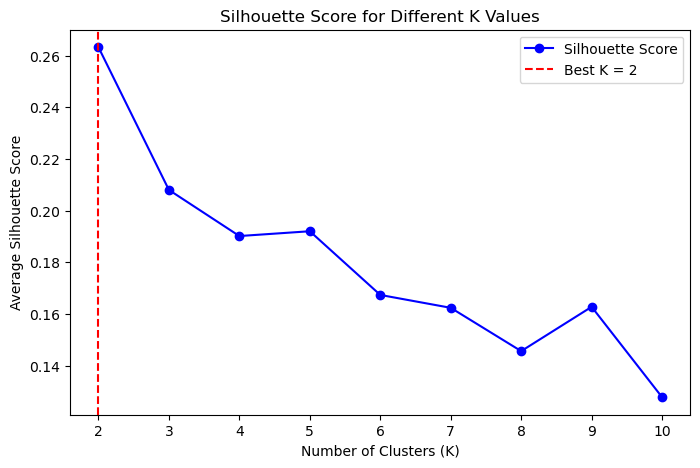

In [83]:
#Silhouette Scores
ave_silhouette = {}

#validation for K-means clustering - how to choose K
K = 10
for i in range(2,K+1): # Testing hyperparameter K from 2 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++')
    cluster_labels = kmeans.fit_predict(X)
    silhouette_vals = silhouette_samples(X, cluster_labels)
    ave_silhouette[i] = np.mean(silhouette_vals)
    
best_k = max(ave_silhouette, key=ave_silhouette.get)
print(f"Best K: {best_k} with silhouette score: {ave_silhouette[best_k]:.4f}")
    
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(ave_silhouette.keys()), list(ave_silhouette.values()), marker='o', linestyle='-', color='b', label="Silhouette Score")
plt.axvline(best_k, color='r', linestyle="--", label=f"Best K = {best_k}")  # Highlight best K
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Score for Different K Values")
plt.legend()
plt.show()

0.26 is a low silhouette score, suggesting the clusters may not be well-separated or that the data isn't very clusterable in a strict KMeans sense.